In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = open('../data/cleaned_poems_lines.txt',  encoding="utf-8").read()

# Lowercase and split the text
corpus = data.split("\n")

# Preview the result
print(corpus)
print(len(corpus))

['መዘንጋት ባለበት በታናሽ ሕሊና', 'መዘመር ልጀምር ለድንግል ምስጋና', 'እኔስ በውዳሴሽ ባሕር እዋኛለሁ', 'ገናንነትሽን ክብርሽን እያሰብኩ', 'የትህትናሽ ነገር ቢወሳ አያልቅም', 'ታነቢያለሽና ለዚህ ክፉ አለም', 'ድንግል ሆይ ለኃጥአን ታስቢያለሽና', 'ልቦናዬ ባንቺ በምልጃሽ ተፅናና', 'ማርያም ሆይ ስለዚህ እንወድሻለን', 'አንቺን ተማፅነናል እንድታማልጂን', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ስለበደለኞች ሊያቀርቡ ልመና', 'እሳትአውያኑ ሱራፌል ኪሩቤል', 'ሊነኩት ያልቻሉት የእሳቱን ነበልባል', 'አንቺ ግን ታቀፍሽው ሳምሽው በከንፈርሽ', 'ከፍጥረት ለይቶ ፍፁም ስላፀናሽ', 'ማርያም ሆይ ስለዚህ እንወድሻለን', 'አንቺን ተማፅነናል', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ስለበደለኞች ሊያቀርቡ ልመና', 'መድኃኔዓለም የለም የሚሳነው', 'አማኑኤል የለም የሚሳነው', 'እርሱ ቃል ሲናገር ተራራው ሜዳ ነው', 'መድኃኔዓለም የለም የሚሳነው', 'አላስብም አልፈዋለሁ ብዬ', 'ጉንጭ አልፎ ትራሴን እያጠበ እንባዬን', 'እየተፈጸመ ኃይሉ በድካሜ', 'ማእበሉን አለፍኩኝ ቀለለልኝ ሸክሜ', 'የቤቴ እራስ ነው የእቅዴ መሪ', 'በክፉም በደጉም ነፍሴን አስተማሪ', 'ፈጥሮ የማይረሳኝ ቤዛዬ ደረሰ', 'ቤቴን ደስታ ሞላው እንባዬ ታበሰ', 'ትናንት ባዶ ነበር የለኝ የሚሰፈር', 'አንዳች አልነበረኝ የሚታይ የሚቆጠር', 'ከርሱ የተነሳ ዛሬ ግን ሙሉ ነኝ', 'ክብር ለእርሱ ይሁን አለ የማይተወኝ', 'እየከለከለ ለእኔ ማይጠቅመኝን', 'በጊዜ እየሰጠ ደግሞ የሚረባኝን', 'ሁሉ በእርሱ ሆኗል አልሆነም ያለ እርሱ', 'ውዳሴ ምስጋና ይድረስ ለንጉሱ', 'እግዚአብሔርን አመስግኑት', 'ሥራህ ግሩም ድንቅ ነው በሉት', 'ሰማይን ያለምሰሶ', 'ምድርንም ያለ መሠረት', 'ያጸና

In [3]:
# Initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization()

# Build the vocabulary
vectorize_layer.adapt(corpus)

In [4]:
# Get the vocabulary and its size
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocabulary}')
print(f'{vocab_size}')

['', '[UNK]', 'ነው', 'ላይ', 'ወደ', 'እንደ', 'ሁሉ', 'አምላክ', 'ጌታ', 'ግን', 'ብሎ', 'እኔ', 'ሆይ', 'ሰው', 'አንድ', 'ስለ', 'አለ', 'ድንግል', 'እግዚአብሔር', 'ምን', 'ደስ', 'ዛሬ', 'ስቡህ', 'ልጅ', 'ሁሉን', 'ፍቅር', 'ጊዜ', 'ይኸው', 'እያለ', 'ነገር', 'ቃል', 'ክርስቶስ', 'አንተ', 'ይቅር', 'ዘመን', 'ዓመት', 'ክብር', 'ከቶ', 'ኢየሱስ', 'አባት', 'በመስቀል', 'መቼ', 'ሁሉም', 'ጋር', 'ዲያብሎስ', 'ዮናስ', 'አዳም', 'ምስጉን', 'መጣ', 'መች', 'ያለ', 'ዝም', 'እኛ', 'እስከ', 'እርሱ', 'አምስቱ', 'ቤት', 'በጣም', 'ማነው', 'መስቀል', 'ለምን', 'ሆኖ', 'የሰው', 'እንኳን', 'እባክህ', 'አለኝ', 'ሰዓት', 'ሥም', 'ድረስ', 'ዛሬም', 'እውነት', 'እንዴት', 'እሱ', 'ነበር', 'ተስፋ', 'ብዙ', 'ብቻ', 'ስትመጪ', 'ሞት', 'ፍሬ', 'ድንቅ', 'ይሁን', 'ያለው', 'እያሉ', 'እኮ', 'እኛን', 'ኤሎሄ', 'አቤት', 'አቤቱ', 'አለው', 'አሁን', 'ናት', 'ነኝ', 'ነበረ', 'ነህ', 'ቀን', 'ዳግም', 'የለም', 'ኢየሱስን', 'አድርጎ', 'አደረሰሽ', 'አንደበት', 'ተወለደ', 'በደል', 'በዚህ', 'በአንድ', 'በር', 'ቅዱስ', 'ስለሆነ', 'ሰዎች', 'ማን', 'ልጆች', 'ፍጥረት', 'ጠላት', 'ጌታችን', 'ጋራ', 'ዳዊት', 'ደግሞ', 'ደም', 'ይህንን', 'ይህን', 'የአይሁድ', 'ዕጣ', 'ዓለም', 'ክፉ', 'እግዚአብሔርን', 'እኔን', 'እራሱን', 'አድርገን', 'አክሊል', 'አምላክን', 'አምላኬ', 'አልፎ', 'አለም', 'ንጉስ', 'ንጉሥ', 'ነቢዩ', 'ኃጢአት', 'ብዛት', 'በዕውነት', 'በራሱ', 'በምድር',

In [5]:
# Initialize the sequences list
input_sequences = []

for line in corpus:
    # Generate the integer sequence of the current line
	sequence = vectorize_layer(line).numpy()

    # Loop over the line several times to generate the subphrases
	for i in range(1, len(sequence)):
        # Generate the subphrase
		n_gram_sequence = sequence[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)


# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [6]:
# Get sample sentence
sentence = corpus[20].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(vocabulary.index(word))

# Print the token list
print(token_list)

sample sentence: ['መድኃኔዓለም', 'የለም', 'የሚሳነው']
[1029, 97, 345]


In [7]:
def sequence_to_text(sequence, vocabulary):
  '''utility to convert integer sequence back to text'''

  # Loop through the integer sequence and look up the word from the vocabulary
  words = [vocabulary[index] for index in sequence]

  # Combine the words into one sentence
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()

  return text

In [8]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0 4887 5077 5220]
decoded to text:       መዘመር ልጀምር ለድንግል
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 191


In [9]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0 4887 5077]
decoded to text:        መዘመር ልጀምር
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 5220


In [10]:
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Put the inputs and labels to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((xs,ys))

# Optimize the dataset for training
dataset = dataset.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE)

In [11]:
from tensorflow.keras import regularizers, callbacks

# Parameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.005  # Reduced for more stable training
dropout_rate = 0.3     # Common dropout rate

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(max_sequence_len - 1,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        lstm_units, return_sequences=False, dropout=dropout_rate, recurrent_dropout=0.2
    )),
    tf.keras.layers.Dense(
        vocab_size,
        activation='softmax',
        kernel_regularizer=regularizers.l2(1e-4)
    )
])

In [12]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 9, 100)         │       540,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 300)            │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5404)           │     1,626,604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,468,204 (9.42 MB)

 Trainable params: 2,468,204 (9.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Early stopping callback
early_stop = callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

epochs = 80

# Train the model
history = model.fit(dataset, epochs=epochs, callbacks=[early_stop])

Epoch 1/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.0093 - loss: 8.9823
Epoch 2/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.0187 - loss: 8.2292
Epoch 3/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.0092 - loss: 8.0344
Epoch 4/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.0123 - loss: 7.9788
Epoch 5/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.0215 - loss: 8.0156
Epoch 6/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.0204 - loss: 7.6714
Epoch 7/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.0325 - loss: 7.4185
Epoch 8/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.0225 - loss: 7.6358
Epoch 9/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.0458 - loss: 7.2133
Epoch 10/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.0539 - loss: 6.8984
Epoch 11/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.0719 - loss: 6.6633
Epoch 12/80
196/196 ━━━━━━━━━━

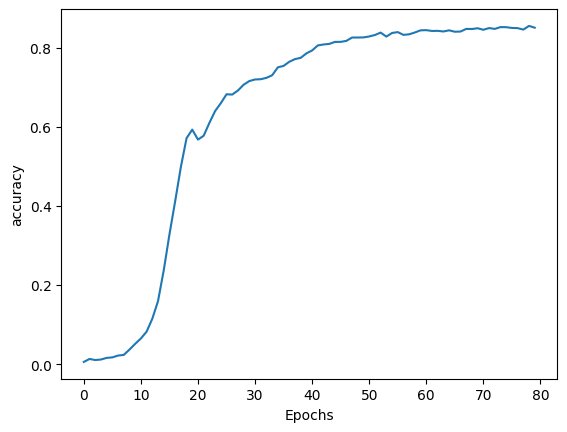

In [14]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [23]:
# Define seed text
seed_text = "እባክህ ታረቀን አምላክ እግዚአብሔር"

# Define total words to predict and line settings
next_words = 40
words_per_line = 5
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)


እባክህ ታረቀን አምላክ እግዚአብሔር ዮናስን አዘዘ እያሉ ቀረ ከዓለም
 ለካ ነው የእቅዴ ዓመት ኢምንት
 ናት ተኝቼ ተኝቼ ከዓለም ምንህ
 ናት ናት በሕይወታችን ስታልፍ ተኝቼ
 ከዓለም ቀረ አልለየኝም ከዓለም ከዓለም
 ፈስሶ ቀረ ናት ስታልፍ ቀረ
 ናት በሕይወታችን ስታልፍ ስታልፍ ቀረ
 የሰው ልጅ ቀረ ኢየሱስ ክርስቶስ



In [24]:
# save the model
model.save('amharic_poem_generator_40k.h5')


In [ ]:
# Define seed text
seed_text = "መዘ"

# Define total words to predict and line settings
next_words = 50
words_per_line = 5
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    choice = np.random.choice([1,2,3])

    predicted = np.argsort(probabilities)[0][-choice]
    
    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)


መዘመር ልጀምር ትኩስ እንላለን ሳልሆን ሳይለውጥ ልቆይ
 ስለሌለኝ ፈስሶ ከዓለም ታገሠኝ ቀረ
 ኢምንት ናት በሕይወታችን ቀረ የዋሕ
 እንደሆንኩኝ ሊታደገን አልለየኝም ኢምንት ናት
 ስታልፍ ቀረ ከዓለም ኢምንት ኢምንት
 ሰዎች ናት ከዓለም ቀረ ከዓለም
 ቀረ ቀረ ቀለሙ ኢምንት ዝም
 ናት ከዓለም ተኝቼ ከዓለም ሊታደገን
 ከዓለም ቀረ የ ከዓለም ተኝቼ
 ፈስሶ ቀረ እያዋዙ ስለሌለኝ ኢምንት

